# 회귀알고리즘과 모델 규제
- 지도학습의 한 종류인 회귀 문제를 이해하고 k-최근접 이웃 알고리즘을 사용해 농어의 무게를 예측하는 회귀 문제
- 농어의 정확한 무게를 측정한 샘플을 활용
### 핵심 키워드
- 회귀
- k-최근접 이웃 회귀
- 결정 계수
- 과대적합과 과소적합
### 지도학습
- 분류
- 회귀 Regression => 예측
### 회귀
- 19세기 통계학자,사회학자 프랜시스 골턴(Francis Galton)이 처음사용
- https://hsm-edu.tistory.com/606
- 정해진 클래스가 없고 임의의 수치를 출력
- 두 변수 사이의 상관관계를 분석하는 방법


## k-최근접 이웃 회귀


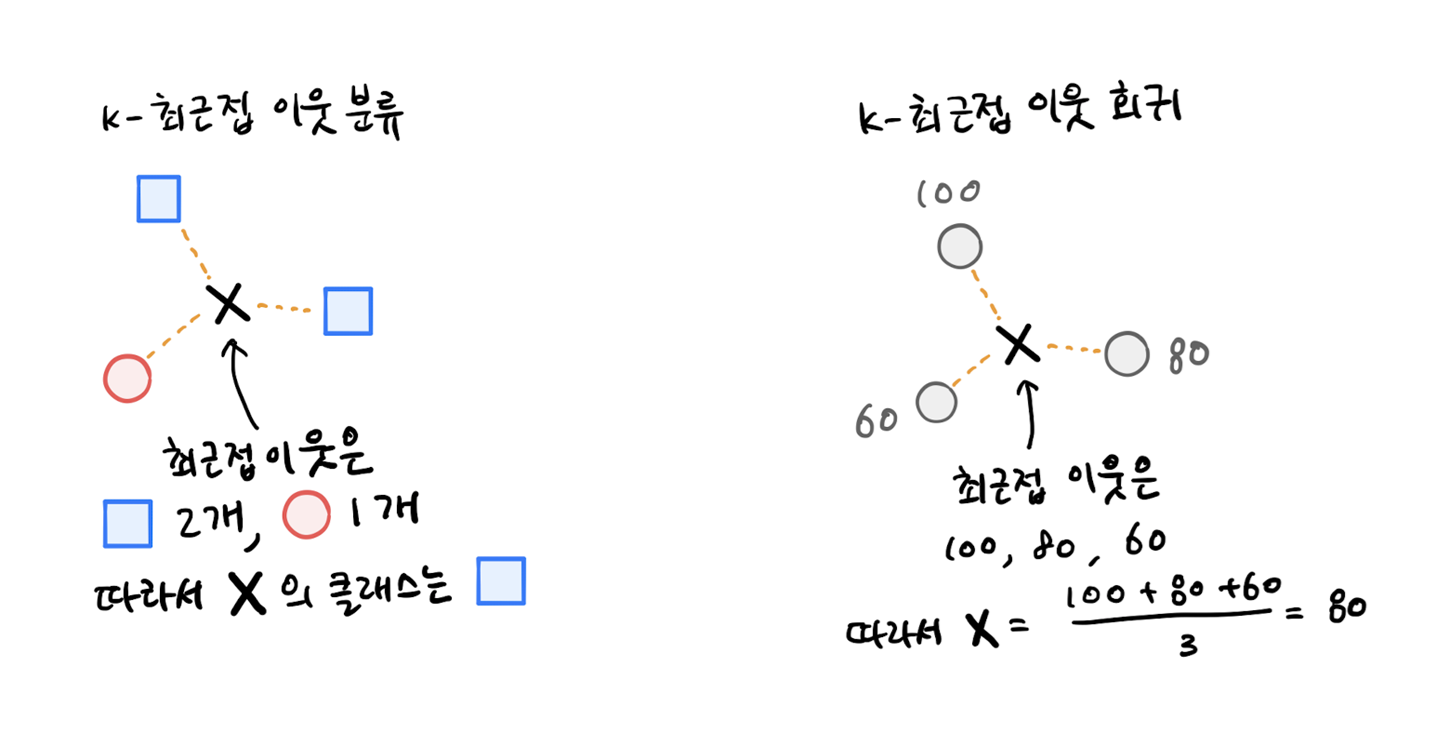

https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-1.ipynb

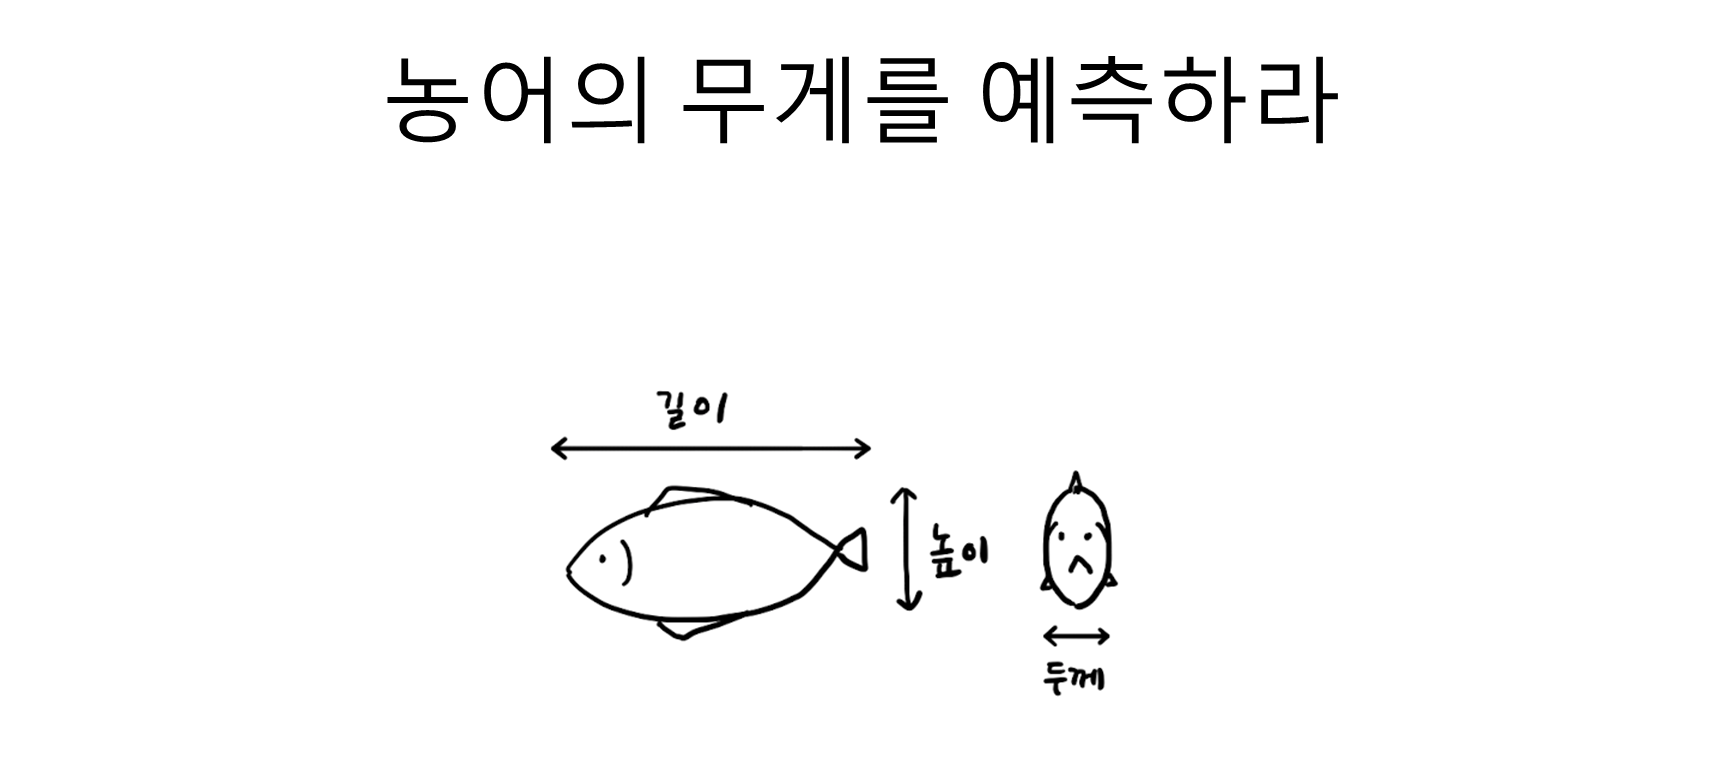

http://bit.ly/perch_data
데이터


In [2]:
import numpy as np


In [3]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )


농어의 길이만 사용

In [4]:
import matplotlib.pyplot as plt


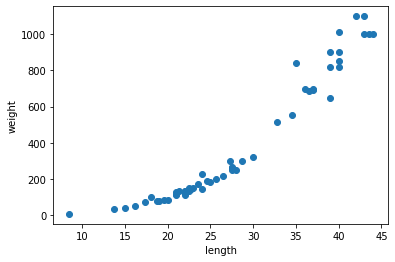

In [5]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

=> 농어의 길이가 늘어남에 따라 무게가 늘어남



In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# 훈련, 테스트 데이터 준비
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [8]:
# 1차원 데이터 셋
print(train_input.shape, test_input.shape)

(42,) (14,)


In [9]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [10]:
# 넘파이 배열의 크기 변경 reshape() 
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [11]:
# 아래 코드의 주석을 제거하고 실행하면 에러가 발생
# test_array = test_array.reshape(2, 3)

In [12]:
# 1차원 배열 => 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [13]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 결정 계수 (R2)
- 회귀 모델의 성과 지표, 평가 값
- 1에 가까울 수록 좋은 회귀 모델
- 0에 가까울 수록 나쁜 회귀 모델
- 타깃의 평균정도를 예측 한다면 분모,분자가 비슷해져서 1-1 = 0
- 예측이 타깃과 비슷하게 예측 한다면 분모 = 0이 되어 1 - 0 = 1
- http://tinyurl.com/mryydh9u


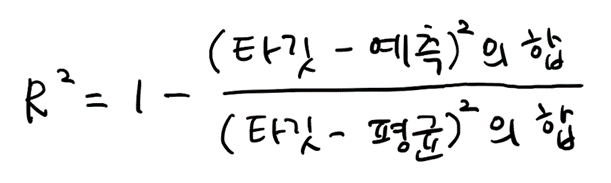

In [14]:
# KNeighborsRegressor : k-최근접 이웃 회귀 알고리즘
from sklearn.neighbors import KNeighborsRegressor

In [15]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [16]:
knr.score(test_input, test_target)

0.992809406101064

In [17]:
from sklearn.metrics import mean_absolute_error

In [18]:
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
# 평균적으로 19g 정도 target과 다름
print(mae)

19.157142857142862


#### 참고: 평균 절대 오차 MAE(Mean absolute error)
- https://tinyurl.com/49zr9z5k


### 과대적합 vs 과소적합
- 훈련 세트로 모델을 훈련하면 일반적으로 훈련 세트 평가 값이 높음
- 훈련 세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련 세트를 잘 학습하는 것이 중요 함
#### 과대적합 overfitting
훈련 세트에만 잘 맞는 모델
과소적합 underfitting
테스트 세트 점수가 더 높은 경우
훈련 세트화 테스트 세트 모두 점수가 낮은 경우
모델이 너무 단순해 적절히 훈련이 안된 것
훈련 셋 수량이 작을 때
모델을 복잡하게 만들기
k-최근접이웃 알고리즘에서는 k 값을 작게 줄이는 것
n_neighbors 기본 5 => 3


### 과대적합 overfitting
- 훈련 세트에만 잘 맞는 모델


### 과소적합 underfitting
- 테스트 세트 점수가 더 높은 경우
- 훈련 세트화 테스트 세트 모두 점수가 낮은 경우
- 모델이 너무 단순해 적절히 훈련이 안된 것
- 훈련 셋 수량이 작을 때

### 모델을 복잡하게 만들기
- k-최근접이웃 알고리즘에서는 k 값을 작게 줄이는 것
- n_neighbors 기본 5 => 3


In [19]:
# 과소적합 되었음
print(knr.score(train_input, train_target))

0.9698823289099254


In [20]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [21]:
print(knr.score(test_input, test_target))


0.9746459963987609


최적의 k값을 찾는 방법은 있는가? => GridSearchCV 제공됨



### 확인문제
#### 복잡한 모델과 단순한 모델을 만들어 확인하기
- 단순한 모델은 기울기가 완만해 짐
- k 값을 [1,3,5,7,10]
- 농어의 길이를 5 ~45로 변경 해서 예측


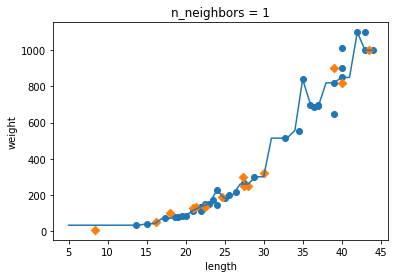

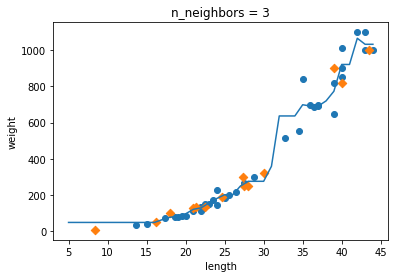

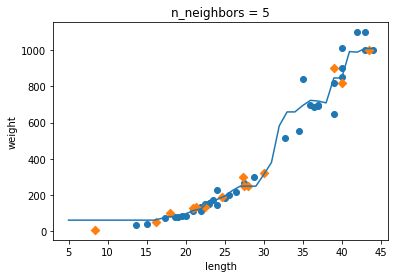

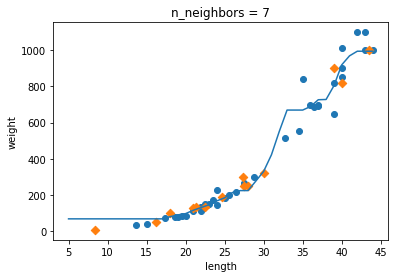

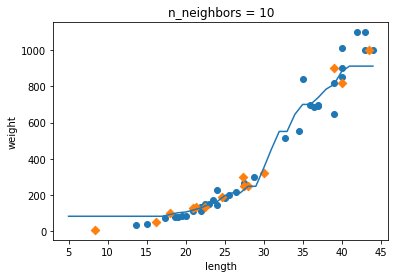

In [22]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 3, 5, 7, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.scatter(test_input, test_target, marker='D')
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()